In [1]:
#import Packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt

from sklearn import preprocessing
from sklearn.decomposition import PCA

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LinearRegression

%matplotlib inline
plt.style.use('fivethirtyeight')
sns.set_context("notebook")
import warnings
warnings.filterwarnings('ignore')

In [2]:
#load Data
bus = pd.read_csv('ttc-bus-delay-data-2023.csv')
display(bus.head())
display(bus.shape)
weather = pd.read_csv('weatherstats_toronto_daily.csv')
display(weather.head())
display(weather.shape)

,Date,Route,Time,Day,Location,Incident,Min Delay,Min Gap,Direction,Vehicle
0,1-Jan-23,91,02:30,Sunday,WOODBINE AND MORTIMER,Diversion,81,111,NaN,8772
1,1-Jan-23,69,02:34,Sunday,WARDEN STATION,Security,22,44,S,8407
2,1-Jan-23,35,03:06,Sunday,JANE STATION,Cleaning - Unsanitary,30,60,N,1051
3,1-Jan-23,900,03:14,Sunday,KIPLING STATION,Security,17,17,NaN,3334
4,1-Jan-23,85,03:43,Sunday,MEADOWALE LOOP,Security,1,1,NaN,1559


(56207, 10)

,date,max_temperature,avg_hourly_temperature,avg_temperature,min_temperature,max_humidex,min_windchill,max_relative_humidity,avg_hourly_relative_humidity,avg_relative_humidity,...,avg_cloud_cover_4,min_cloud_cover_4,max_cloud_cover_8,avg_hourly_cloud_cover_8,avg_cloud_cover_8,min_cloud_cover_8,max_cloud_cover_10,avg_hourly_cloud_cover_10,avg_cloud_cover_10,min_cloud_cover_10
0,2024-11-27,4.9,1.70,1.75,-1.4,NaN,-6.0,77,66.9,65.0,...,NaN,NaN,8,5.5,4.5,1,NaN,NaN,NaN,NaN
1,2024-11-26,7.2,5.22,4.55,1.9,NaN,NaN,100,81.5,80.5,...,NaN,NaN,8,7.0,6.0,4,NaN,NaN,NaN,NaN
2,2024-11-25,6.6,3.23,2.15,-2.3,NaN,-4.0,100,85.7,85.5,...,NaN,NaN,8,6.8,5.5,3,NaN,NaN,NaN,NaN
3,2024-11-24,7.3,3.45,3.45,-0.4,NaN,NaN,95,80.0,77.5,...,NaN,NaN,8,4.8,4.5,1,NaN,NaN,NaN,NaN
4,2024-11-23,9.4,5.19,5.55,1.7,NaN,NaN,100,85.8,82.0,...,NaN,NaN,8,5.7,5.0,2,NaN,NaN,NaN,NaN


(1000, 72)

In [3]:
weather['date'] = pd.to_datetime(weather['date'])
weather_2023 = weather[weather['date'].dt.year == 2023]
display(weather_2023)
bus['date'] = pd.to_datetime(bus['Date'])
display(bus)

,date,max_temperature,avg_hourly_temperature,avg_temperature,min_temperature,max_humidex,min_windchill,max_relative_humidity,avg_hourly_relative_humidity,avg_relative_humidity,...,avg_cloud_cover_4,min_cloud_cover_4,max_cloud_cover_8,avg_hourly_cloud_cover_8,avg_cloud_cover_8,min_cloud_cover_8,max_cloud_cover_10,avg_hourly_cloud_cover_10,avg_cloud_cover_10,min_cloud_cover_10
332,2023-12-31,1.4,0.04,-0.10,-1.6,NaN,-7.0,98,86.2,87.5,...,NaN,NaN,8,8.0,8.0,8,NaN,NaN,NaN,NaN
333,2023-12-30,1.3,-0.28,0.20,-0.9,NaN,-7.0,89,78.2,79.5,...,NaN,NaN,8,7.9,7.5,7,NaN,NaN,NaN,NaN
334,2023-12-29,6.4,4.87,3.85,1.3,NaN,NaN,100,97.5,93.5,...,NaN,NaN,8,7.7,6.0,4,NaN,NaN,NaN,NaN
335,2023-12-28,7.7,6.58,6.75,5.8,NaN,NaN,100,100.0,100.0,...,NaN,NaN,8,6.7,6.0,4,NaN,NaN,NaN,NaN
336,2023-12-27,8.2,7.52,7.25,6.3,NaN,NaN,100,100.0,100.0,...,NaN,NaN,8,7.3,6.0,4,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
692,2023-01-05,4.2,3.19,3.25,2.3,NaN,NaN,100,92.4,88.5,...,NaN,NaN,8,7.8,7.0,6,NaN,NaN,NaN,NaN
693,2023-01-04,3.7,2.60,2.90,2.1,NaN,NaN,100,100.0,100.0,...,NaN,NaN,8,7.9,7.0,6,NaN,NaN,NaN,NaN
694,2023-01-03,4.0,2.78,2.20,0.4,NaN,NaN,100,98.7,94.5,...,NaN,NaN,8,8.0,7.5,7,NaN,NaN,NaN,NaN
695,2023-01-02,5.1,3.73,3.50,1.9,NaN,NaN,100,87.2,86.0,...,NaN,NaN,8,7.1,5.0,2,NaN,NaN,NaN,NaN


,Date,Route,Time,Day,Location,Incident,Min Delay,Min Gap,Direction,Vehicle,date
0,1-Jan-23,91,02:30,Sunday,WOODBINE AND MORTIMER,Diversion,81,111,NaN,8772,2023-01-01
1,1-Jan-23,69,02:34,Sunday,WARDEN STATION,Security,22,44,S,8407,2023-01-01
2,1-Jan-23,35,03:06,Sunday,JANE STATION,Cleaning - Unsanitary,30,60,N,1051,2023-01-01
3,1-Jan-23,900,03:14,Sunday,KIPLING STATION,Security,17,17,NaN,3334,2023-01-01
4,1-Jan-23,85,03:43,Sunday,MEADOWALE LOOP,Security,1,1,NaN,1559,2023-01-01
...,...,...,...,...,...,...,...,...,...,...,...
56202,31-Dec-23,41,01:26,Sunday,KEELE AND EGLINTON,Operations - Operator,28,53,N,1133,2023-12-31
56203,31-Dec-23,94,01:31,Sunday,CASTLE FRANK STATION,Emergency Services,10,20,NaN,8415,2023-12-31
56204,31-Dec-23,63,01:40,Sunday,OAKWOOD AND VAUGHAN,Diversion,33,43,N,7010,2023-12-31
56205,31-Dec-23,34,01:54,Sunday,EGLINTON STATION,Emergency Services,0,0,N,8761,2023-12-31


In [4]:
# Ensure both datasets have the date column in the same datetime format
weather['date'] = pd.to_datetime(weather['date'])
bus['Date'] = pd.to_datetime(bus['Date'])  # Adjust this column name if necessary
bus_2023 = pd.merge(bus, weather, left_on='Date', right_on='date', how='inner')
display(bus_2023)

,Date,Route,Time,Day,Location,Incident,Min Delay,Min Gap,Direction,Vehicle,...,avg_cloud_cover_4,min_cloud_cover_4,max_cloud_cover_8,avg_hourly_cloud_cover_8,avg_cloud_cover_8,min_cloud_cover_8,max_cloud_cover_10,avg_hourly_cloud_cover_10,avg_cloud_cover_10,min_cloud_cover_10
0,2023-01-01,91,02:30,Sunday,WOODBINE AND MORTIMER,Diversion,81,111,NaN,8772,...,NaN,NaN,8,7.8,7.0,6,NaN,NaN,NaN,NaN
1,2023-01-01,69,02:34,Sunday,WARDEN STATION,Security,22,44,S,8407,...,NaN,NaN,8,7.8,7.0,6,NaN,NaN,NaN,NaN
2,2023-01-01,35,03:06,Sunday,JANE STATION,Cleaning - Unsanitary,30,60,N,1051,...,NaN,NaN,8,7.8,7.0,6,NaN,NaN,NaN,NaN
3,2023-01-01,900,03:14,Sunday,KIPLING STATION,Security,17,17,NaN,3334,...,NaN,NaN,8,7.8,7.0,6,NaN,NaN,NaN,NaN
4,2023-01-01,85,03:43,Sunday,MEADOWALE LOOP,Security,1,1,NaN,1559,...,NaN,NaN,8,7.8,7.0,6,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56202,2023-12-31,41,01:26,Sunday,KEELE AND EGLINTON,Operations - Operator,28,53,N,1133,...,NaN,NaN,8,8.0,8.0,8,NaN,NaN,NaN,NaN
56203,2023-12-31,94,01:31,Sunday,CASTLE FRANK STATION,Emergency Services,10,20,NaN,8415,...,NaN,NaN,8,8.0,8.0,8,NaN,NaN,NaN,NaN
56204,2023-12-31,63,01:40,Sunday,OAKWOOD AND VAUGHAN,Diversion,33,43,N,7010,...,NaN,NaN,8,8.0,8.0,8,NaN,NaN,NaN,NaN
56205,2023-12-31,34,01:54,Sunday,EGLINTON STATION,Emergency Services,0,0,N,8761,...,NaN,NaN,8,8.0,8.0,8,NaN,NaN,NaN,NaN


# Data Cleaning

In [6]:
#remove duplicate
bus_2023 = bus_2023.drop_duplicates()
# Check for completely duplicate rows
duplicate_rows = bus_2023[bus_2023.duplicated(keep=False)]
# Output the duplicate rows or a message if none are found
if not duplicate_rows.empty:
    print("Rows with exactly the same data:") #make sure no duplicate
    display(duplicate_rows)
else:
    print("No rows with exactly the same data.") #make sure no duplicate
    display(bus_2023.shape)

No rows with exactly the same data.


(56007, 83)

In [7]:
#Fill nan and drop the not valid rows
bus_2023['Direction'] = bus_2023['Direction'].fillna('Both')
bus_2023 = bus_2023.drop(columns=['max_humidex', 'min_windchill', 'max_wind_gust','wind_gust_dir_10s'])
bus_2023 = bus_2023.dropna(subset=['Route'])

# Analysing Features

In [38]:
#new featuers
bus_2023['IsWeekend'] = bus_2023['Day'].isin(['Saturday', 'Sunday'])
bus_2023['Year'] = bus_2023['Date'].dt.year
bus_2023['Month'] = bus_2023['Date'].dt.month
bus_2023['Day'] = bus_2023['Date'].dt.day

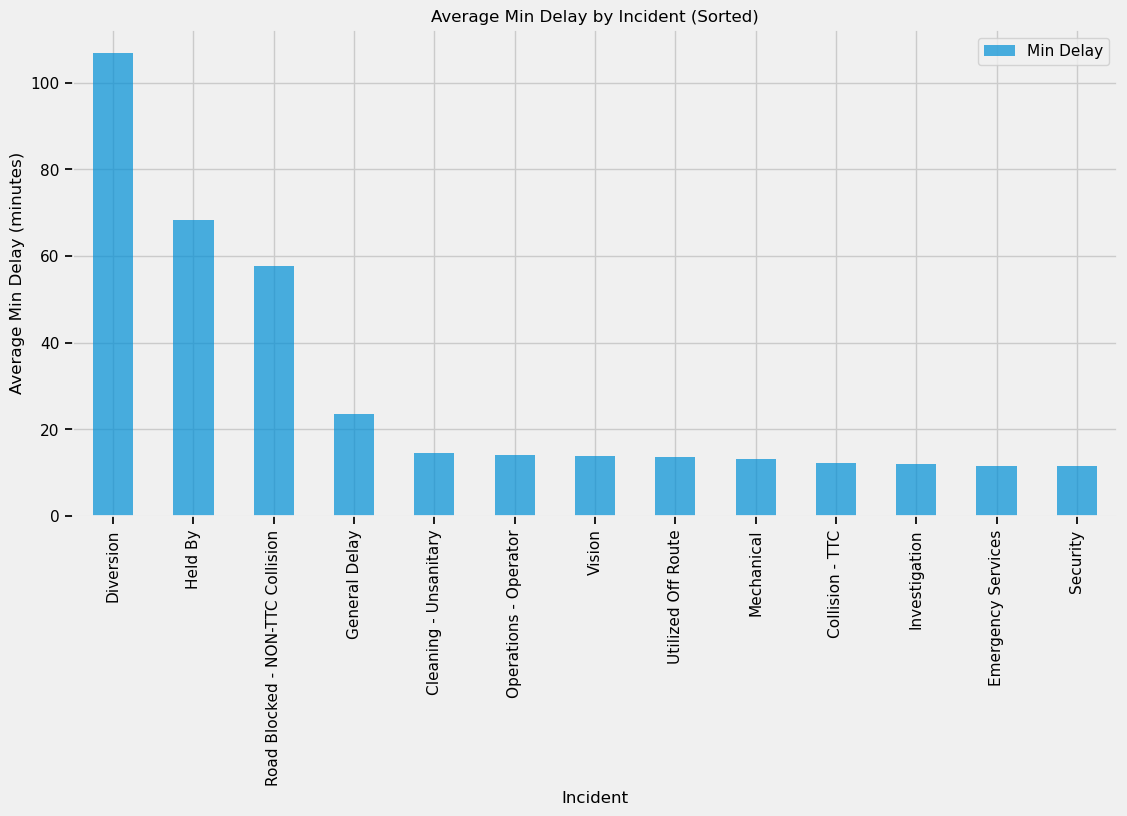

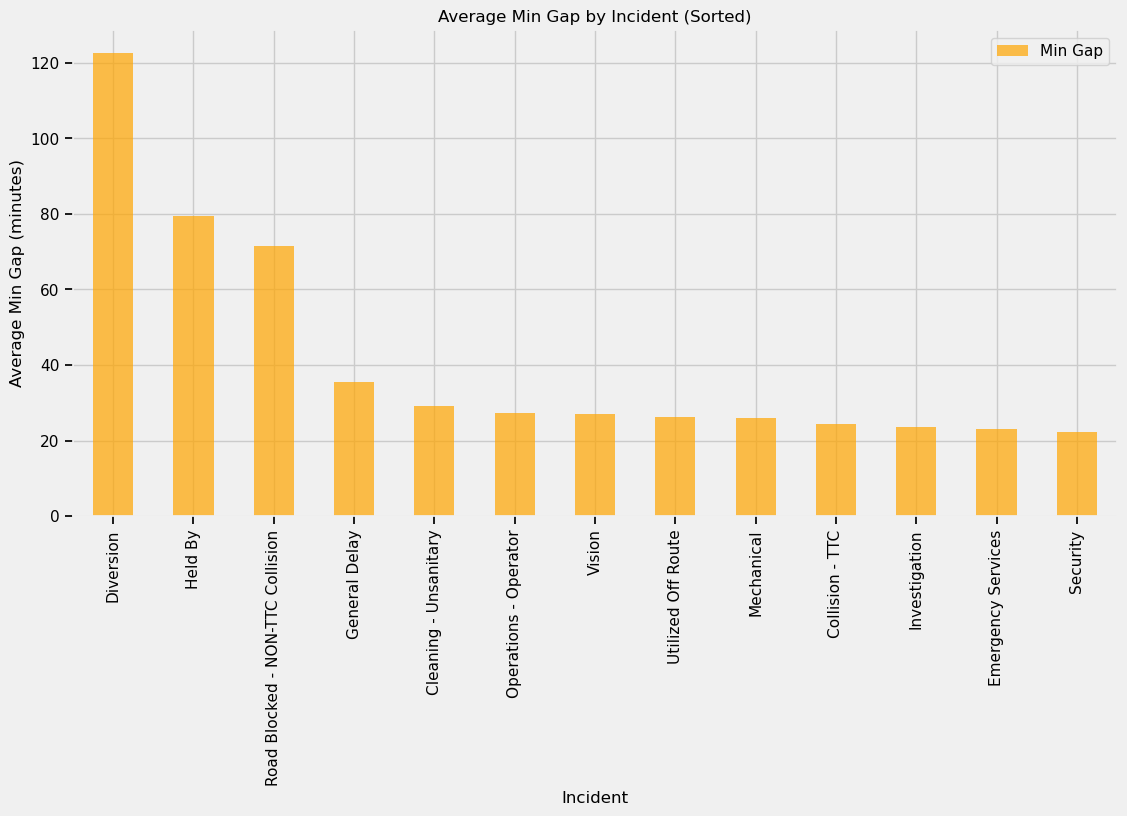

In [40]:
# Sort the data by 'Min Delay' and plot
incident_analysis_sorted_delay = incident_analysis.sort_values(by='Min Delay', ascending=False)
incident_analysis_sorted_delay['Min Delay'].plot(kind='bar', figsize=(12, 6), label='Min Delay', alpha=0.7)
plt.title('Average Min Delay by Incident (Sorted)')
plt.xlabel('Incident')
plt.ylabel('Average Min Delay (minutes)')
plt.xticks(rotation=90)
plt.legend()
plt.show()

# Sort the data by 'Min Gap' and plot
incident_analysis_sorted_gap = incident_analysis.sort_values(by='Min Gap', ascending=False)
incident_analysis_sorted_gap['Min Gap'].plot(kind='bar', figsize=(12, 6), color='orange', label='Min Gap', alpha=0.7)
plt.title('Average Min Gap by Incident (Sorted)')
plt.xlabel('Incident')
plt.ylabel('Average Min Gap (minutes)')
plt.xticks(rotation=90)
plt.legend()
plt.show()

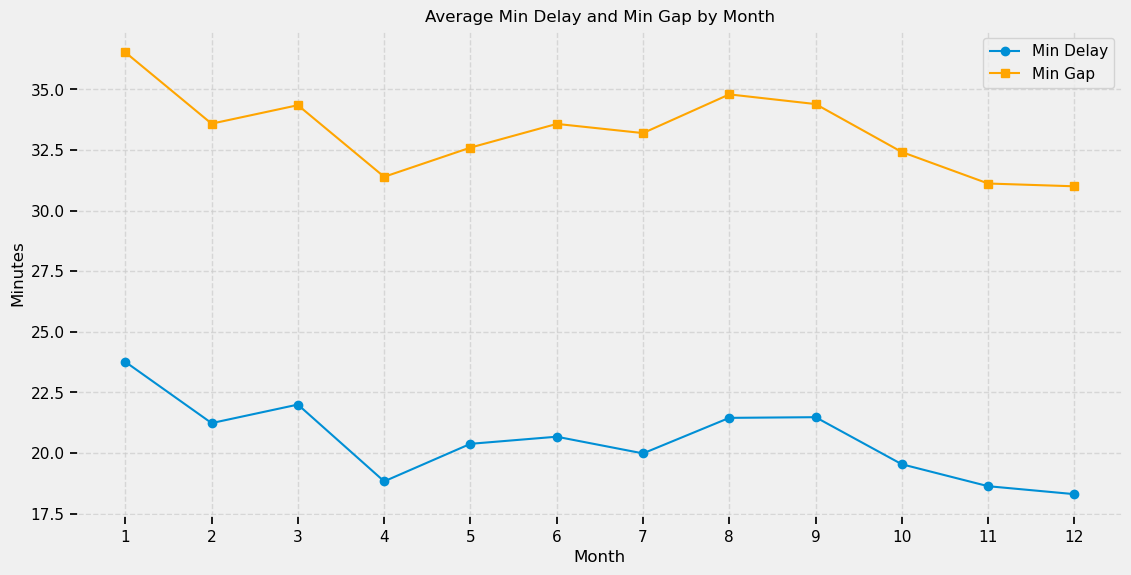

In [44]:
# Group data by Month and calculate the mean of Min Delay and Min Gap
monthly_analysis = bus_2023.groupby('Month')[['Min Delay', 'Min Gap']].mean()

# Plot Min Delay and Min Gap on the same line graph
plt.figure(figsize=(12, 6))
plt.plot(monthly_analysis.index, monthly_analysis['Min Delay'], marker='o', label='Min Delay')
plt.plot(monthly_analysis.index, monthly_analysis['Min Gap'], marker='s', label='Min Gap', color='orange')

# Add title and labels
plt.title('Average Min Delay and Min Gap by Month')
plt.xlabel('Month')
plt.ylabel('Minutes')
plt.xticks(ticks=monthly_analysis.index, labels=monthly_analysis.index)
plt.legend()
plt.grid(visible=True, linestyle='--', alpha=0.7)
plt.show()

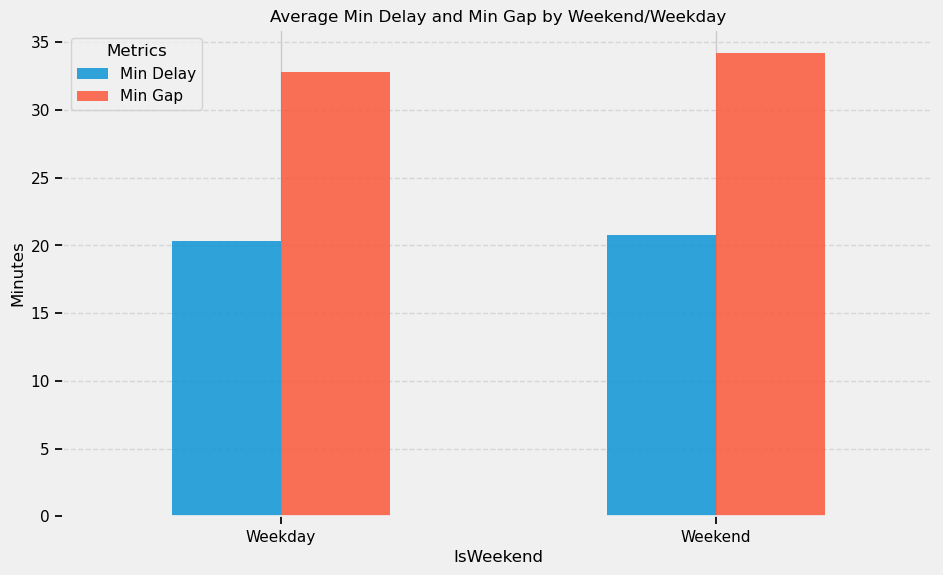

In [48]:
# Group data by IsWeekend and calculate the mean of Min Delay and Min Gap
weekend_analysis = bus_2023.groupby('IsWeekend')[['Min Delay', 'Min Gap']].mean()

# Create a bar chart for Min Delay and Min Gap
weekend_analysis.plot(kind='bar', figsize=(10, 6), alpha=0.8)

# Add title and labels
plt.title('Average Min Delay and Min Gap by Weekend/Weekday')
plt.xlabel('IsWeekend')
plt.ylabel('Minutes')
plt.xticks(ticks=[0, 1], labels=['Weekday', 'Weekend'], rotation=0)
plt.legend(title='Metrics')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

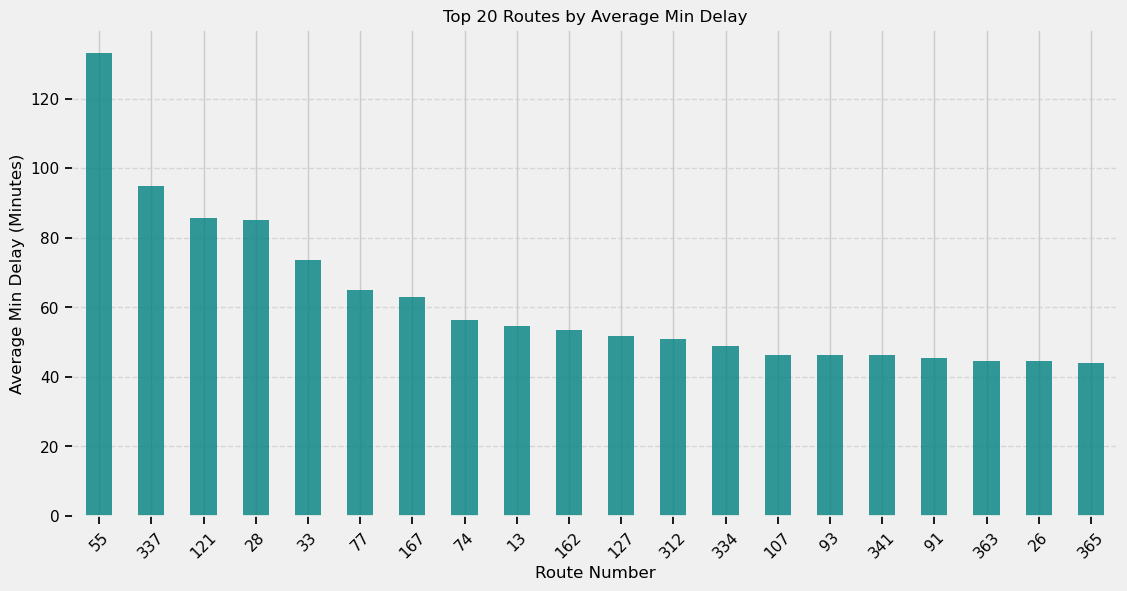

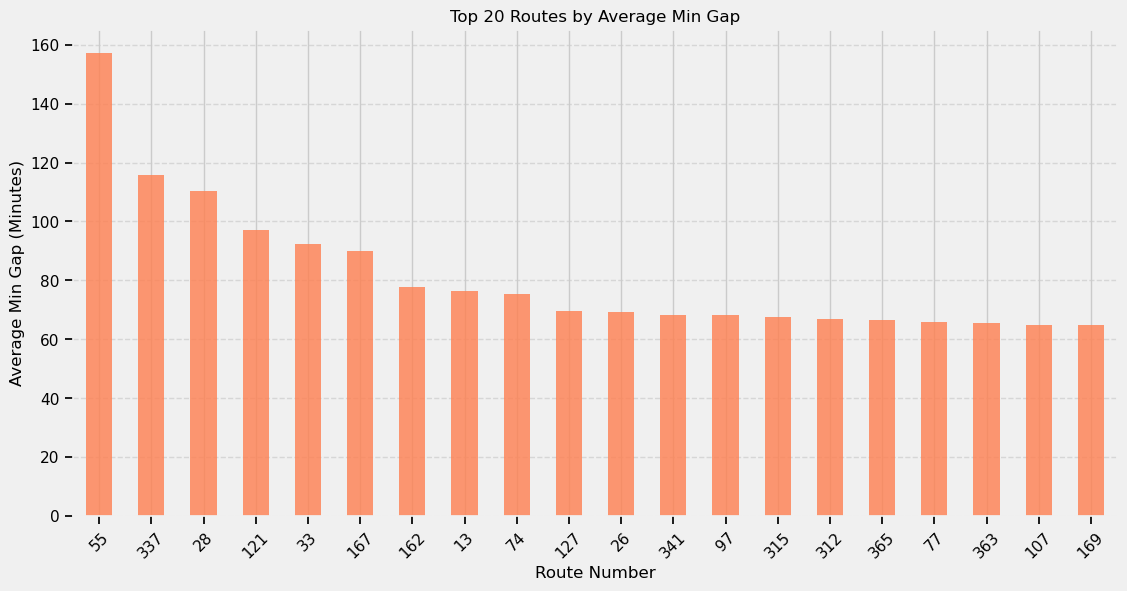

In [52]:
# Group data by Route and calculate the mean of Min Delay and Min Gap
route_analysis = bus_2023.groupby('Route')[['Min Delay', 'Min Gap']].mean()

# Sort by Min Delay and keep the top 20
top_min_delay = route_analysis['Min Delay'].sort_values(ascending=False).head(20)

# Plot Min Delay
plt.figure(figsize=(12, 6))
top_min_delay.plot(kind='bar', color='teal', alpha=0.8)
plt.title('Top 20 Routes by Average Min Delay')
plt.xlabel('Route Number')
plt.ylabel('Average Min Delay (Minutes)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.show()

# Sort by Min Gap and keep the top 20
top_min_gap = route_analysis['Min Gap'].sort_values(ascending=False).head(20)

# Plot Min Gap
plt.figure(figsize=(12, 6))
top_min_gap.plot(kind='bar', color='coral', alpha=0.8)
plt.title('Top 20 Routes by Average Min Gap')
plt.xlabel('Route Number')
plt.ylabel('Average Min Gap (Minutes)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.show()


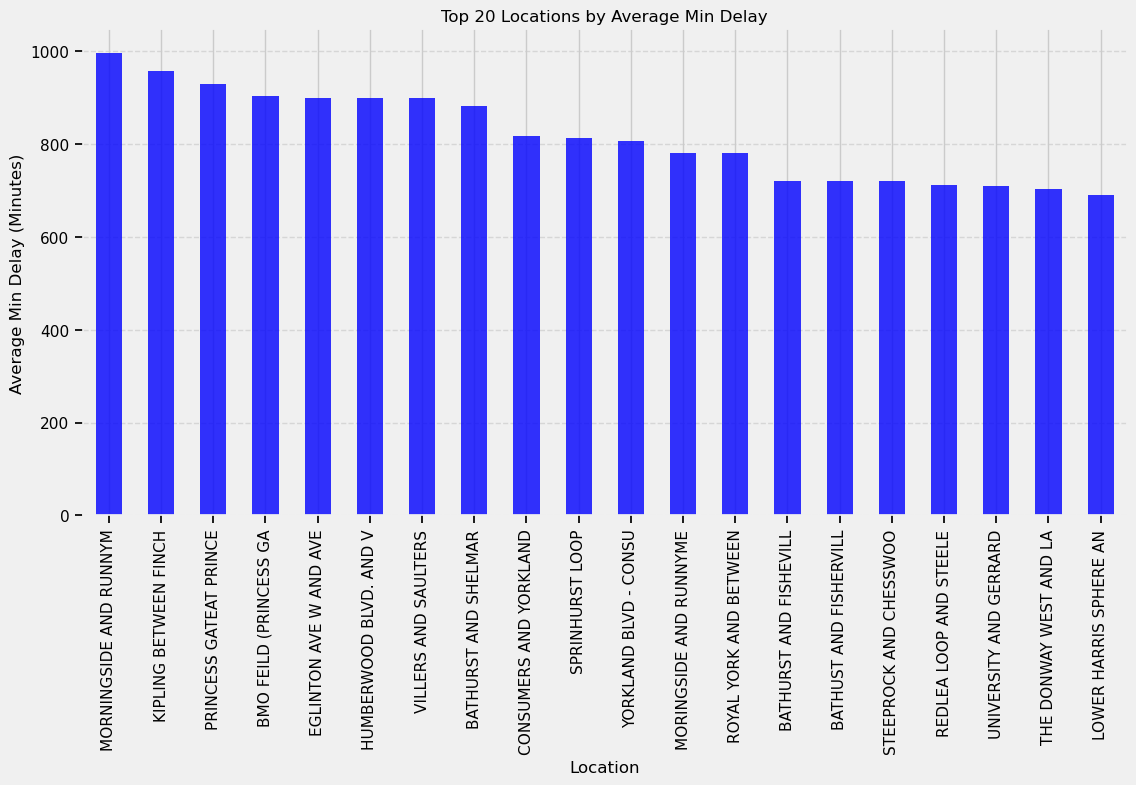

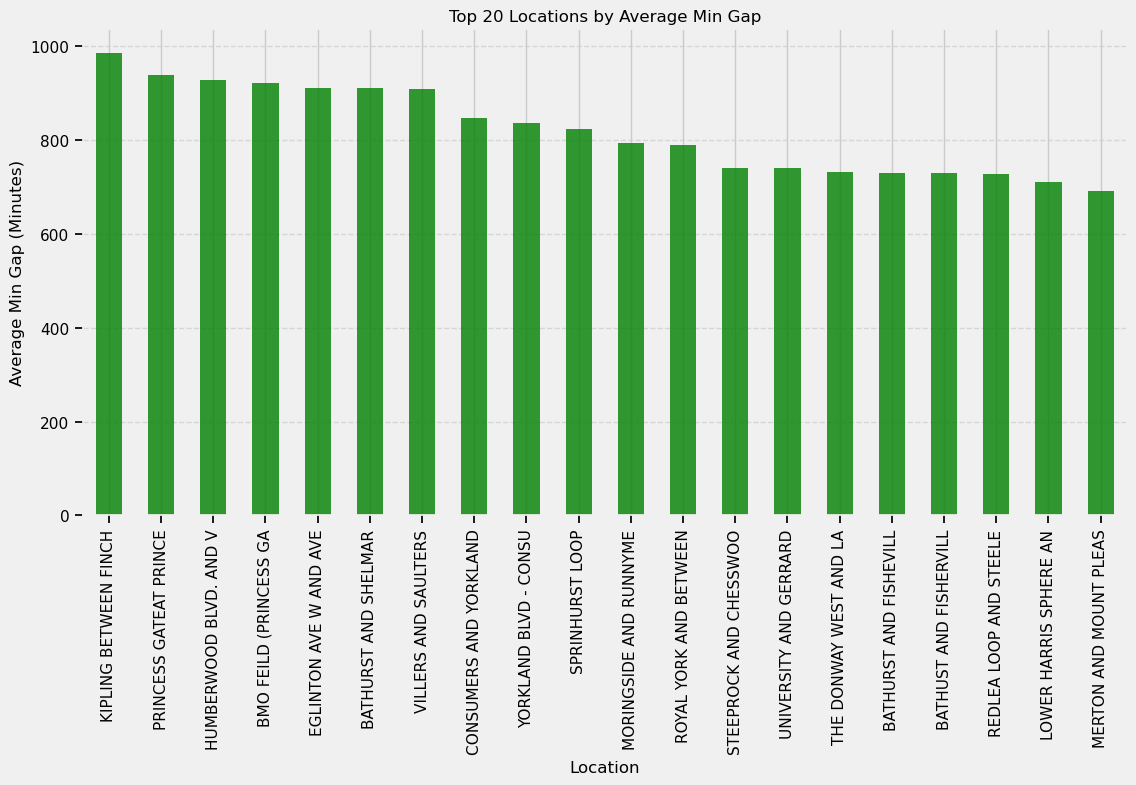

In [56]:
location_analysis = bus_2023.groupby('Location')[['Min Delay', 'Min Gap']].mean()
top_min_delay_location = location_analysis['Min Delay'].sort_values(ascending=False).head(20)

plt.figure(figsize=(12, 6))
top_min_delay_location.plot(kind='bar', color='blue', alpha=0.8)
plt.title('Top 20 Locations by Average Min Delay')
plt.xlabel('Location')
plt.ylabel('Average Min Delay (Minutes)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=90)
plt.show()
top_min_gap_location = location_analysis['Min Gap'].sort_values(ascending=False).head(20)

plt.figure(figsize=(12, 6))
top_min_gap_location.plot(kind='bar', color='green', alpha=0.8)
plt.title('Top 20 Locations by Average Min Gap')
plt.xlabel('Location')
plt.ylabel('Average Min Gap (Minutes)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=90)
plt.show()


In [64]:
# Generate new columns to assign scores to non-float columns
# Calculate the average Min Delay for each Route
route_scores = bus_2023.groupby('Route')['Min Delay'].mean()
bus_2023['Route Score'] = bus_2023['Route'].map(route_scores)

# Calculate the average Min Delay for each Location
location_scores = bus_2023.groupby('Location')['Min Delay'].mean()
bus_2023['Location Score'] = bus_2023['Location'].map(location_scores)

# Calculate the average Min Delay for each Incident
incident_scores = bus_2023.groupby('Incident')['Min Delay'].mean()
bus_2023['Incident Score'] = bus_2023['Incident'].map(incident_scores)

# Calculate the average Min Delay for each Direction
direction_scores = bus_2023.groupby('Direction')['Min Delay'].mean()
bus_2023['Direction Score'] = bus_2023['Direction'].map(direction_scores)

bus_2023.head()

,Date,Route,Time,Day,Location,Incident,Min Delay,Min Gap,Direction,Vehicle,...,avg_hourly_cloud_cover_10,avg_cloud_cover_10,min_cloud_cover_10,IsWeekend,Year,Month,Route Score,Location Score,Incident Score,Direction Score
0,2023-01-01,91,02:30,1,WOODBINE AND MORTIMER,Diversion,81,111,Both,8772,...,NaN,NaN,NaN,True,2023,1,45.469072,27.333333,106.801904,24.340621
1,2023-01-01,69,02:34,1,WARDEN STATION,Security,22,44,S,8407,...,NaN,NaN,NaN,True,2023,1,17.906977,16.900826,11.537764,18.796694
2,2023-01-01,35,03:06,1,JANE STATION,Cleaning - Unsanitary,30,60,N,1051,...,NaN,NaN,NaN,True,2023,1,12.484615,13.004673,14.630303,19.732277
3,2023-01-01,900,03:14,1,KIPLING STATION,Security,17,17,Both,3334,...,NaN,NaN,NaN,True,2023,1,14.823308,13.717124,11.537764,24.340621
4,2023-01-01,85,03:43,1,MEADOWALE LOOP,Security,1,1,Both,1559,...,NaN,NaN,NaN,True,2023,1,16.471496,0.500000,11.537764,24.340621


In [72]:
display(bus_2023.columns.tolist())
print(bus_2023[['date_x', 'date_y']])

['Date',
 'Route',
 'Time',
 'Day',
 'Location',
 'Incident',
 'Min Delay',
 'Min Gap',
 'Direction',
 'Vehicle',
 'date_x',
 'date_y',
 'max_temperature',
 'avg_hourly_temperature',
 'avg_temperature',
 'min_temperature',
 'max_relative_humidity',
 'avg_hourly_relative_humidity',
 'avg_relative_humidity',
 'min_relative_humidity',
 'max_dew_point',
 'avg_hourly_dew_point',
 'avg_dew_point',
 'min_dew_point',
 'max_wind_speed',
 'avg_hourly_wind_speed',
 'avg_wind_speed',
 'min_wind_speed',
 'max_pressure_sea',
 'avg_hourly_pressure_sea',
 'avg_pressure_sea',
 'min_pressure_sea',
 'max_pressure_station',
 'avg_hourly_pressure_station',
 'avg_pressure_station',
 'min_pressure_station',
 'max_visibility',
 'avg_hourly_visibility',
 'avg_visibility',
 'min_visibility',
 'max_health_index',
 'avg_hourly_health_index',
 'avg_health_index',
 'min_health_index',
 'heatdegdays',
 'cooldegdays',
 'growdegdays_5',
 'growdegdays_7',
 'growdegdays_10',
 'precipitation',
 'rain',
 'snow',
 'snow_on

          date_x     date_y
0     2023-01-01 2023-01-01
1     2023-01-01 2023-01-01
2     2023-01-01 2023-01-01
3     2023-01-01 2023-01-01
4     2023-01-01 2023-01-01
...          ...        ...
56202 2023-12-31 2023-12-31
56203 2023-12-31 2023-12-31
56204 2023-12-31 2023-12-31
56205 2023-12-31 2023-12-31
56206 2023-12-31 2023-12-31

[55437 rows x 2 columns]


In [74]:
#select features for prediction
def feature_engineering(data):
    
    feature_selected = ['Date',
 'Time',
 'Day',
 'Vehicle',
 'max_temperature',
 'avg_hourly_temperature',
 'avg_temperature',
 'min_temperature',
 'max_relative_humidity',
 'avg_hourly_relative_humidity',
 'avg_relative_humidity',
 'min_relative_humidity',
 'max_dew_point',
 'avg_hourly_dew_point',
 'avg_dew_point',
 'min_dew_point',
 'max_wind_speed',
 'avg_hourly_wind_speed',
 'avg_wind_speed',
 'min_wind_speed',
 'max_pressure_sea',
 'avg_hourly_pressure_sea',
 'avg_pressure_sea',
 'min_pressure_sea',
 'max_pressure_station',
 'avg_hourly_pressure_station',
 'avg_pressure_station',
 'min_pressure_station',
 'max_visibility',
 'avg_hourly_visibility',
 'avg_visibility',
 'min_visibility',
 'max_health_index',
 'avg_hourly_health_index',
 'avg_health_index',
 'min_health_index',
 'heatdegdays',
 'cooldegdays',
 'growdegdays_5',
 'growdegdays_7',
 'growdegdays_10',
 'precipitation',
 'rain',
 'snow',
 'snow_on_ground',
 'sunrise_hhmm',
 'sunrise_unixtime',
 'sunrise_f',
 'sunset_hhmm',
 'sunset_unixtime',
 'sunset_f',
 'daylight',
 'min_uv_forecast',
 'max_uv_forecast',
 'min_high_temperature_forecast',
 'max_high_temperature_forecast',
 'min_low_temperature_forecast',
 'max_low_temperature_forecast',
 'solar_radiation',
 'max_cloud_cover_4',
 'avg_hourly_cloud_cover_4',
 'avg_cloud_cover_4',
 'min_cloud_cover_4',
 'max_cloud_cover_8',
 'avg_hourly_cloud_cover_8',
 'avg_cloud_cover_8',
 'min_cloud_cover_8',
 'max_cloud_cover_10',
 'avg_hourly_cloud_cover_10',
 'avg_cloud_cover_10',
 'min_cloud_cover_10',
 'IsWeekend',
 'Year',
 'Month',
 'Route Score',
 'Location Score',
 'Incident Score',
 'Direction Score']

    selected_data = data[feature_selected]
    
    return selected_data
X = feature_engineering(bus_2023)
display(X.head())
y_delay = bus_2023['Min Delay']
display(y_delay.head())

,Date,Time,Day,Vehicle,max_temperature,avg_hourly_temperature,avg_temperature,min_temperature,max_relative_humidity,avg_hourly_relative_humidity,...,avg_hourly_cloud_cover_10,avg_cloud_cover_10,min_cloud_cover_10,IsWeekend,Year,Month,Route Score,Location Score,Incident Score,Direction Score
0,2023-01-01,02:30,1,8772,4.2,3.26,3.2,2.2,100,94.5,...,NaN,NaN,NaN,True,2023,1,45.469072,27.333333,106.801904,24.340621
1,2023-01-01,02:34,1,8407,4.2,3.26,3.2,2.2,100,94.5,...,NaN,NaN,NaN,True,2023,1,17.906977,16.900826,11.537764,18.796694
2,2023-01-01,03:06,1,1051,4.2,3.26,3.2,2.2,100,94.5,...,NaN,NaN,NaN,True,2023,1,12.484615,13.004673,14.630303,19.732277
3,2023-01-01,03:14,1,3334,4.2,3.26,3.2,2.2,100,94.5,...,NaN,NaN,NaN,True,2023,1,14.823308,13.717124,11.537764,24.340621
4,2023-01-01,03:43,1,1559,4.2,3.26,3.2,2.2,100,94.5,...,NaN,NaN,NaN,True,2023,1,16.471496,0.500000,11.537764,24.340621


0    81
1    22
2    30
3    17
4     1
Name: Min Delay, dtype: int64